<a href="https://colab.research.google.com/github/alexbrill/tf-train/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 

mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels)  = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


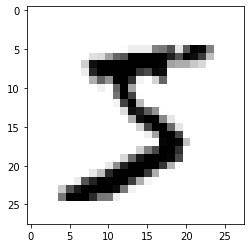

In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap=plt.cm.binary)

#print(train_images[0])

In [21]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.5371 - accuracy: 0.8498
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1366 - accuracy: 0.9609
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0902 - accuracy: 0.9734
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0627 - accuracy: 0.9823
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0507 - accuracy: 0.9852


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc) 

313/313 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9777
test_acc: 0.9776999950408936


In [57]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from skimage.color import rgb2gray

uploaded = files.upload()

for fn in uploaded.keys(): 
  path = '/content/' + fn
  img = image.load_img(path, target_size=(28, 28))

  x = image.img_to_array(img)
  x = rgb2gray(x) / 255
  x = np.expand_dims(x, axis=0)
  x = np.vstack([x])

  print(x.shape)

  classes = model.predict(images)
  #print(classes)

Saving sample_image.png to sample_image (36).png
(1, 28, 28)


ValueError: ignored